In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# load the dataset
df=pd.read_csv("Heart.csv")

In [3]:
# print 1st 5 rows
df.head(5)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
#print shape of data
df.shape

(303, 15)

Description of each column:(14 features)

1] Age: Age of the patient in years.

2] Sex: Gender of the patient (1 = male; 0 = female).

3] ChestPain: Type of chest pain experienced, categorized as:

0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic

4] RestBP: Resting blood pressure in mm Hg upon hospital admission.

5] Chol: Serum cholesterol level in mg/dL.

6] Fbs: Fasting blood sugar > 120 mg/dL (1 = true; 0 = false).

7] RestECG: Resting electrocardiographic results, with values:

0: Normal
1: Having ST-T wave abnormality
2: Showing probable or definite left ventricular hypertrophy

8] MaxHR: Maximum heart rate achieved during exercise.

9] ExAng: Exercise-induced angina (1 = yes; 0 = no).

10] Oldpeak: ST depression induced by exercise relative to rest.

11] Slope: Slope of the peak exercise ST segment, categorized as:

0: Upsloping
1: Flat
2: Downsloping

12] Ca: Number of major vessels (0-3) colored by fluoroscopy.

13] Thal: Thalassemia status, with values:

0: Normal
1: Fixed defect
2: Reversible defect

14] AHD: Presence of heart disease (1 = yes; 0 = no).

In [5]:
# print information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [6]:
# description of dataset
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [7]:
#check the null values 
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In this dataset we can see that only 2 columns i.e. Ca, Thal are contain null values 

In [8]:
# "Ca" is the numbrical column so replace missing values by mean value
df["Ca"].fillna(df["Ca"].mean,inplace=True)

In [9]:
#"Thal" is the categorical column so replace it's missing values by mode
df["Thal"] = df["Thal"].fillna(df["Thal"].mode()[0])

In [10]:
#verify the missing values are filled ?
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

# Operation 1
-----Standard derivation, variance calculation for every numberical column-----

In [11]:
print(df.dtypes)

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca             object
Thal           object
AHD            object
dtype: object


Here Age, Sex, RestBP, Chol, Fbs, RestECG, MaxHR, ExAng, Oldpeak, Slope are the numbrical columns. 

------------Variance and Standard derivation of Age column---------------

In [12]:
#step 1: calculate mean val
mean_val=sum(df["Age"]/len(df["Age"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["Age"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_Age = sum(squared_diff) / (len(df["Age"]) - 1)
# step 4: take square root to get std dev
std_dev_Age=np.sqrt(variance_Age)
print("Variance of Age column: ",variance_Age)
print("Standard derivation of Age column: ",std_dev_Age)

Variance of Age column:  81.69741874849731
Standard derivation of Age column:  9.038662442446743


In [13]:
#verify using var() and std() in-build function
print(df["Age"].var())
print(df["Age"].std())

81.69741874849731
9.038662442446743


------------Variance and Standard derivation of Chol column---------------

In [14]:
#step 1: calculate mean val
mean_val=sum(df["Chol"]/len(df["Chol"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["Chol"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_Chol = sum(squared_diff) / (len(df["Chol"]) - 1)
# step 4: take square root to get std dev
std_dev_Chol=np.sqrt(variance_Chol)
print("Variance of Chol column: ",variance_Chol)
print("Standard derivation of Chol column: ",std_dev_Chol)

Variance of Chol column:  2680.8491902170335
Standard derivation of Chol column:  51.77691754263702


In [15]:
#verify using var() and std() in-build function
print(df["Chol"].var())
print(df["Chol"].std())

2680.8491902170326
51.776917542637015


------------Variance and Standard derivation of RestBP column---------------

In [16]:
#step 1: calculate mean val
mean_val=sum(df["RestBP"]/len(df["RestBP"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["RestBP"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_RestBP = sum(squared_diff) / (len(df["RestBP"]) - 1)
# step 4: take square root to get std dev
std_dev_RestBP=np.sqrt(variance_RestBP)
print("Variance of RestBP column: ",variance_RestBP)
print("Standard derivation of RestBP column: ",std_dev_RestBP)

Variance of RestBP column:  309.7511201451271
Standard derivation of RestBP column:  17.59974772958769


In [17]:
#verify using var() and std() in-build function
print(df["RestBP"].var())
print(df["RestBP"].std())

309.751120145127
17.599747729587687


------------Variance and Standard derivation of MaxHR column---------------

In [18]:
#step 1: calculate mean val
mean_val=sum(df["MaxHR"]/len(df["MaxHR"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["MaxHR"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_MaxHR = sum(squared_diff) / (len(df["MaxHR"]) - 1)
# step 4: take square root to get std dev
std_dev_MaxHR=np.sqrt(variance_MaxHR)
print("Variance of RestBP column: ",variance_MaxHR)
print("Standard derivation of RestBP column: ",std_dev_MaxHR)

Variance of RestBP column:  523.2657749218629
Standard derivation of RestBP column:  22.875003276980376


In [19]:
#verify using var() and std() in-build function
print(df["MaxHR"].var())
print(df["MaxHR"].std())

523.2657749218629
22.875003276980376


------------Variance and Standard derivation of Oldpeak column---------------

In [20]:
#step 1: calculate mean val
mean_val=sum(df["Oldpeak"]/len(df["Oldpeak"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["Oldpeak"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_Oldpeak = sum(squared_diff) / (len(df["Oldpeak"]) - 1)
# step 4: take square root to get std dev
std_dev_Oldpeak=np.sqrt(variance_Oldpeak)
print("Variance of Oldpeak column: ",variance_Oldpeak)
print("Standard derivation of Oldpeak column: ",std_dev_Oldpeak)

Variance of Oldpeak column:  1.3480952068716785
Standard derivation of Oldpeak column:  1.1610750220686339


In [21]:
#verify using var() and std() in-build function
print(df["Oldpeak"].var())
print(df["Oldpeak"].std())

1.3480952068716792
1.161075022068634


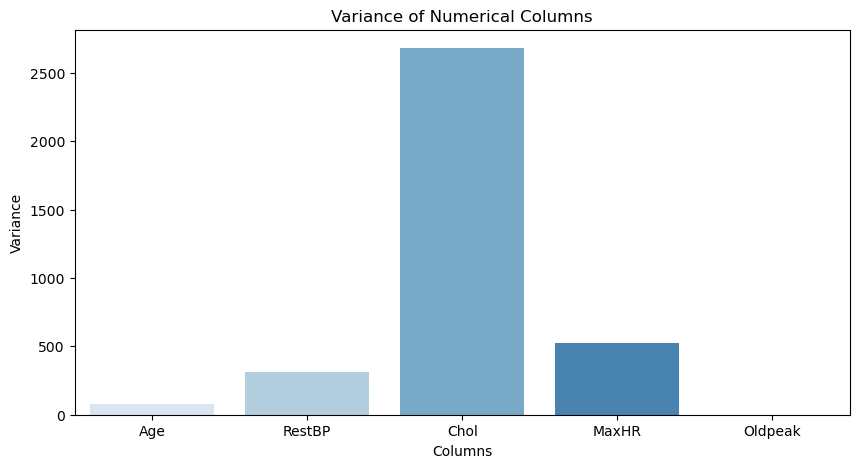

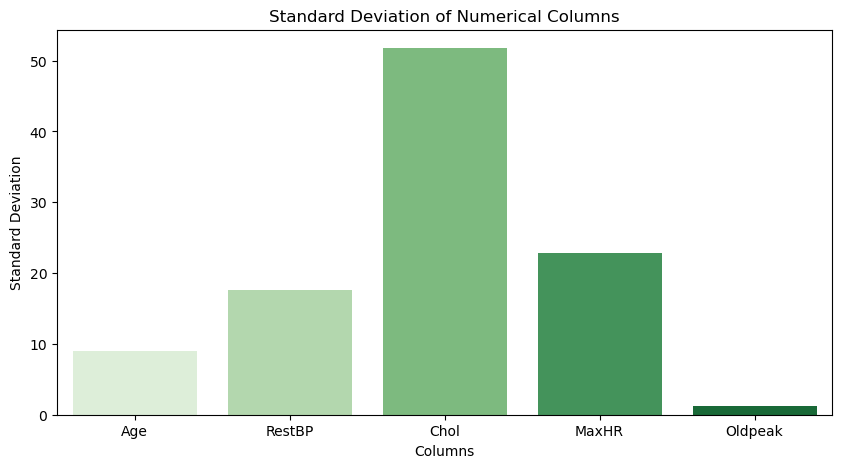

In [22]:
# Compute variance and standard deviation
variance_values = df[["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]].var()
std_dev_values = df[["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]].std()

# Create a bar plot for variance
plt.figure(figsize=(10, 5))
sns.barplot(x=variance_values.index, y=variance_values.values, palette="Blues")
plt.xlabel("Columns")
plt.ylabel("Variance")
plt.title("Variance of Numerical Columns")
plt.show()

# Create a bar plot for standard deviation
plt.figure(figsize=(10, 5))
sns.barplot(x=std_dev_values.index, y=std_dev_values.values, palette="Greens")
plt.xlabel("Columns")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Numerical Columns")
plt.show()

# Operation 2
-----Find covarience and perform correlation analysis using correlation coeficient-----

In [23]:

##### Covariance and correlation analysis of Age Vs MaxHR #####


#select 2 numbrical column -- Age, MaxHR and drop NaN values
x=df["Age"].dropna().values
y=df["MaxHR"].dropna().values
#step 1: compute mean of x and y
mean_x=sum(x)/len(x)
mean_y=sum(y)/len(y)

#step 2: compute covariance
covariance_AgeVsMaxBP=sum((x-mean_x)*(y-mean_y))/(len(x)-1)

#step 3: compute standard derivation
std_x=(sum((x-mean_x)**2)/(len(x)-1))**0.5
std_y=(sum((y-mean_y)**2)/(len(x)-1))**0.5

#step 4: compute correlation coeficient
correlation_AgeVsMaxBP=covariance_AgeVsMaxBP/(std_x * std_y)

print("Covariance between Age and MaxBP: ",covariance_AgeVsMaxBP)
print("Correlation coeficient between Age and MaxBP: ",correlation_AgeVsMaxBP)

Covariance between Age and MaxBP:  -81.42306515419753
Correlation coeficient between Age and MaxBP:  -0.39380580598682113


In [27]:
#verify using cov() and corr() in-build function
covariance_matrix=df.cov()
correlation_matrix=df.corr()
correlation_matrix

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope
Unnamed: 0,1.000000,-0.002367,-0.070849,-0.022028,-0.095518,-0.039471,-0.150232,-0.105488,-0.000402,-0.120384,-0.028458
Age,-0.002367,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770
Sex,-0.070849,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533
RestBP,-0.022028,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382
Chol,-0.095518,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062
Fbs,-0.039471,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894
RestECG,-0.150232,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946
MaxHR,-0.105488,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601
ExAng,-0.000402,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748
Oldpeak,-0.120384,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537


In [28]:
covariance_matrix

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope
Unnamed: 0,7676.000000,-1.874172,-2.900662,-33.966887,-433.301325,-1.231788,-13.096026,-211.413907,-0.016556,-12.246026,-1.536424
Age,-1.874172,81.697419,-0.411995,45.328678,97.787489,0.381614,1.338797,-81.423065,0.389220,2.138850,0.901034
Sex,-2.900662,-0.411995,0.218368,-0.530107,-4.836994,0.007967,0.010065,-0.520184,0.032096,0.055436,0.010808
RestBP,-33.966887,45.328678,-0.530107,309.751120,118.573339,1.099207,2.566455,-18.258005,0.535473,3.865638,1.273053
Chol,-433.301325,97.787489,-4.836994,118.573339,2680.849190,0.181496,8.811521,-4.064651,1.491345,2.799282,-0.129598
Fbs,-1.231788,0.381614,0.007967,1.099207,0.181496,0.126877,0.024654,-0.063996,0.004295,0.002377,0.013147
RestECG,-13.096026,1.338797,0.010065,2.566455,8.811521,0.024654,0.989968,-1.897941,0.039670,0.131850,0.082126
MaxHR,-211.413907,-81.423065,-0.520184,-18.258005,-4.064651,-0.063996,-1.897941,523.265775,-4.063307,-9.112209,-5.435501
ExAng,-0.016556,0.389220,0.032096,0.535473,1.491345,0.004295,0.039670,-4.063307,0.220707,0.157216,0.074618
Oldpeak,-12.246026,2.138850,0.055436,3.865638,2.799282,0.002377,0.131850,-9.112209,0.157216,1.348095,0.413219


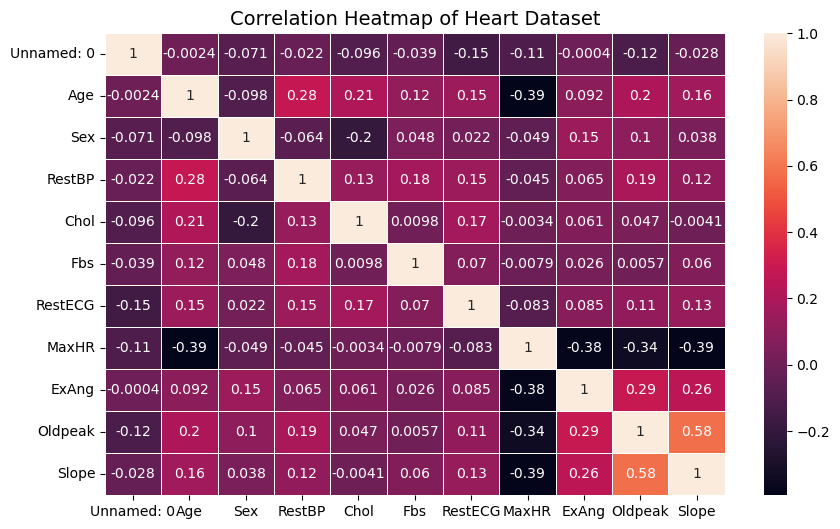

In [84]:
# Heatmap to show the correlation between Age and MaxBP

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

plt.title("Correlation Heatmap of Heart Dataset", fontsize=14)
plt.show()

Observation: 

Covariance is -81.42 the negative value indicates an inverse relationship between Age and MaxBP (As age increases, MaxBP tends to decrease) 

Correlation coefficient is -0.39 The correaltion coefficient ranges from -1 to 1 : -1 -->perfect negative correlation, 0-->No correlation, +1-->positive correlation.

Here, -0.39 shows an negative correlation, meaning that as Age inceases, MaxBP tends to decrease,

So, we conclude that age affects heart rate(i.e., older indiviuals tend to have MaxHR).

# Operation 3
-----Identify independent features and unwanted features-----

In [86]:
# 1st find highly correlated features 
threshold=0.8
high_corr_features=set()
for i in range(len(correlation_matrix.columns)):#iterates over the upper triangle of the correlation matrix 
    for j in range(i):   #avoid duplicate pairs
        if abs(correlation_matrix.iloc[i,j])>threshold:
            col_name=correlation_matrix.columns[i]
            high_corr_features.add(col_name)
print("Strongly correlated featues are: ",high_corr_features)

# if there is strongly correlated features(i.e. unwanted features) then drop it
reduced_features=df.drop(columns=high_corr_features)

Strongly correlated featues are:  set()


In [89]:
# print shape to compare before and after reducing the features
print(reduced_features.shape)

(303, 15)


# Operation 4
-----Data discretization using equi frequency binning method on age attribute-----

In [97]:
k=3  #no. of bins

# perform equi-frequency binning into 3 bins
df["Age_binned"]=pd.qcut(df["Age"],q=3,labels=["Young","Middle-Age","Elder"])
#print the bins 
print(df["Age_binned"])

0           Elder
1           Elder
2           Elder
3           Young
4           Young
          ...    
298         Young
299         Elder
300    Middle-Age
301    Middle-Age
302         Young
Name: Age_binned, Length: 303, dtype: category
Categories (3, object): ['Young' < 'Middle-Age' < 'Elder']


<AxesSubplot:xlabel='Age', ylabel='Count'>

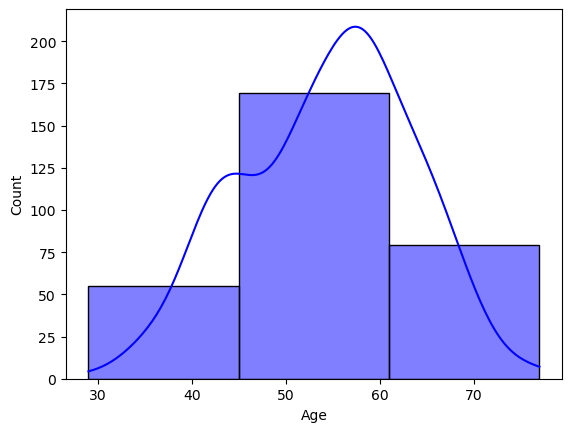

In [110]:
# visualize bins using histogram
sns.histplot(df['Age'], bins=k, kde=True,color="blue")

Observation:

Majority of individuals in the dataset are aged 50-60. So the higher risk of heart issues in this age group.

# Operation 5
-----Data Normalization 

using: min-max normalization, Z-score normalization, decimal scaling normalization----- 

In [111]:
# Min-Max normalization ---> scales values between 0 and 1. Best for bounded values

# Min-Max for Rest blood presserl (RestBP)
df["RestBP_MinMax"]=(df["RestBP"]-df["RestBP"].min())/(df["RestBP"].max()-df["RestBP"].min())
print(df["RestBP_MinMax"])

0      0.481132
1      0.622642
2      0.245283
3      0.339623
4      0.339623
         ...   
298    0.150943
299    0.471698
300    0.339623
301    0.339623
302    0.415094
Name: RestBP_MinMax, Length: 303, dtype: float64


In [112]:
# Min-Max for Cholestrol(Chol)
df["Chol_MinMax"]=(df["Chol"]-df["Chol"].min())/(df["Chol"].max()-df["Chol"].min())
print(df["Chol_MinMax"])

0      0.244292
1      0.365297
2      0.235160
3      0.283105
4      0.178082
         ...   
298    0.315068
299    0.152968
300    0.011416
301    0.251142
302    0.111872
Name: Chol_MinMax, Length: 303, dtype: float64


In [114]:
# Min-Max for MaxHR
df["MaxHR_MinMax"]=(df["MaxHR"]-df["MaxHR"].min())/(df["MaxHR"].max()-df["MaxHR"].min())
print(df["MaxHR"])

0      150
1      108
2      129
3      187
4      172
      ... 
298    132
299    141
300    115
301    174
302    173
Name: MaxHR, Length: 303, dtype: int64


Observation of Min-Max scaling:
    
-RestBP and Chol are well scaled between 0 and 1.

-MaxHR is not normalized yet, so its values remain in the original range (i.e. 150, 108, etc.).

In [116]:
# Z-score normalization ---> scales values with mean=0 and standard deviation=1

# Z-score for Rest blood presser (RestBP)
df["RestBP_ZScore"] = (df["RestBP"] - df["RestBP"].mean()) / df["RestBP"].std()
print(df["RestBP_ZScore"])

0      0.756274
1      1.608559
2     -0.664201
3     -0.096011
4     -0.096011
         ...   
298   -1.232391
299    0.699455
300   -0.096011
301   -0.096011
302    0.358541
Name: RestBP_ZScore, Length: 303, dtype: float64


In [117]:
# Z-score for Cholestrol
df["Chol_ZScore"] = (df["Chol"] - df["Chol"].mean()) / df["Chol"].std()
print(df["Chol_ZScore"])

0     -0.264463
1      0.759159
2     -0.341717
3      0.063869
4     -0.824558
         ...   
298    0.334260
299   -1.037008
300   -2.234453
301   -0.206522
302   -1.384653
Name: Chol_ZScore, Length: 303, dtype: float64


In [119]:
#Z-score for MaxHR
df["MaxHR_ZScore"] = (df["MaxHR"] - df["MaxHR"].mean()) / df["MaxHR"].std()
print(df["MaxHR_ZScore"])

0      0.017169
1     -1.818896
2     -0.900864
3      1.634655
4      0.978917
         ...   
298   -0.769716
299   -0.376274
300   -1.512885
301    1.066349
302    1.022633
Name: MaxHR_ZScore, Length: 303, dtype: float64


Observation:

RestBP, Chol, and MaxHR are standardized using Z-score normalization. Values are now centered around 0, with positive values indicating above-average readings and negative values indicating below-average readings. RestBP and Chol show wider variation, while MaxHR has a balanced distribution.

In [120]:
# Decimal scaling normalization ---> scales values by moving the decimal point based on the maximum absolute value
# Formula--> x'=x/10^j  where j is the no. of digit in Xmax

# Decimal scaling for Rest blood presser (RestBP)
j_RestBP=len(str(abs(df["RestBP"].max())))
df["RestBP_decimal"]=df["RestBP"]/(10**j_RestBP)
print(df["RestBP_decimal"])

0      0.145
1      0.160
2      0.120
3      0.130
4      0.130
       ...  
298    0.110
299    0.144
300    0.130
301    0.130
302    0.138
Name: RestBP_decimal, Length: 303, dtype: float64


In [121]:
# Decimal scaling for Caholestrol (Chol)
j_Chol=len(str(abs(df["Chol"].max())))
df["Chol_decimal"]=df["Chol"]/(10**j_Chol)
print(df["Chol_decimal"])

0      0.233
1      0.286
2      0.229
3      0.250
4      0.204
       ...  
298    0.264
299    0.193
300    0.131
301    0.236
302    0.175
Name: Chol_decimal, Length: 303, dtype: float64


In [122]:
# Decimal scaling for MaxHR
j_MaxHR=len(str(abs(df["MaxHR"].max())))
df["MaxHR_decimal"]=df["MaxHR"]/(10**j_MaxHR)
print(df["MaxHR_decimal"])

0      0.150
1      0.108
2      0.129
3      0.187
4      0.172
       ...  
298    0.132
299    0.141
300    0.115
301    0.174
302    0.173
Name: MaxHR_decimal, Length: 303, dtype: float64


Observation:

RestBP, Chol, and MaxHR are scaled using decimal scaling normalization, where values are adjusted by dividing by a power of 10. This ensures all values are within a small range, making them easier to compare while preserving relative differences.

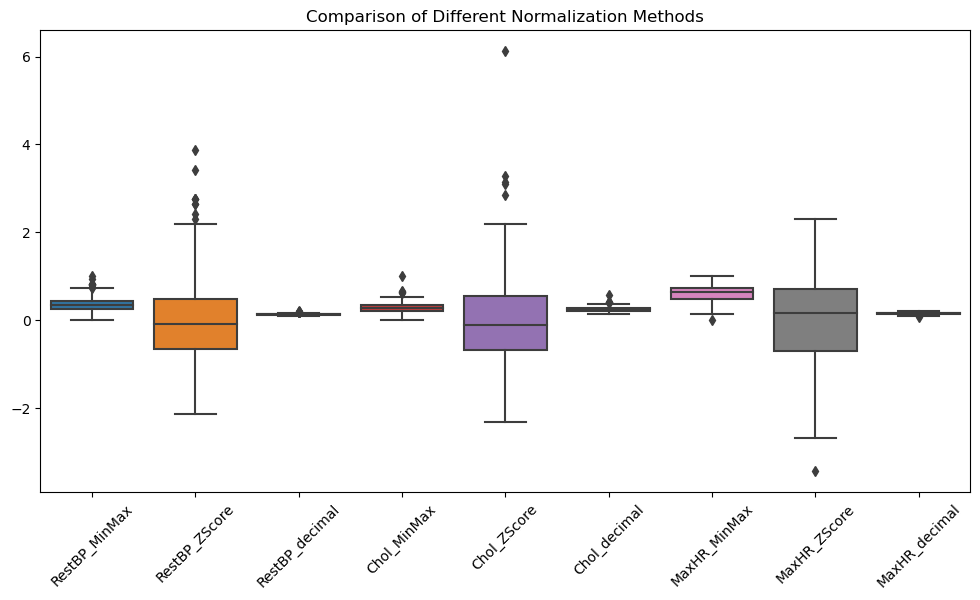

In [123]:
# Create a DataFrame with all normalization methods
normalized_data = df[["RestBP_MinMax", "RestBP_ZScore", "RestBP_decimal",
                      "Chol_MinMax", "Chol_ZScore", "Chol_decimal",
                      "MaxHR_MinMax", "MaxHR_ZScore", "MaxHR_decimal"]]

# Plot box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=normalized_data)
plt.xticks(rotation=45)
plt.title("Comparison of Different Normalization Methods")
plt.show()


Final Observation :
    
    Min-Max Scaling is ideal if all features need to be within the same 
    scale (e.g., neural networks).
    
    Z-Score Normalization is useful for detecting outliers in attributes 
    like Chol and MaxHR.
    
    Decimal Scaling is not as effective in this case, but it ensures 
    that values remain within a small decimal range.

# Final Conclusion:

Feature selection and normalization improved data quality for machine learning models.

Strong correlations were identified and redundant features were dropped to avoid multicollinearity.

Heart rate tends to decline with age, confirming medical insights about cardiovascular health.

The dataset indicates that individuals aged 50-60 are at higher risk, making it a key target group for healthcare interventions.